In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### 好奇房屋年齡影響買賣價格的程度

想解決的問題：想知道是否買屋齡越高的房子，價格就越低

### `讀入台北市的不動產買賣資料`

In [140]:
df = pd.read_csv('a_lvr_land_a.csv')

In [141]:
df.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,building present situation pattern - health,building present situation pattern - compartme...,Whether there is manages the organization,total price Yuan,the unit price a Yuan square meter,the berth category,berth shifting total area square meter,the berth total price Yuan,the note,serial number
1,文山區,房地(土地+建物),臺北市文山區萬盛街146巷1~30號,36.31,住,NaN,NaN,1071225,土地1建物1車位0,四層,...,5,有,無,15800000,150735,NaN,0.0,0,依仲介公司提供之資料登錄，含增建或未登記建物。,RPPNMLLKKHOFFAA96CA
2,文山區,房地(土地+建物),臺北市文山區木柵路二段121~150號,40.33,住,NaN,NaN,1080112,土地1建物1車位0,三層,...,2,有,無,13000000,131154,NaN,0.0,0,NaN,RPRNMLMKKHOFFAA27CA
3,文山區,房地(土地+建物)+車位,臺北市文山區下崙路28巷1~30號,25.42,住,NaN,NaN,1071225,土地1建物1車位1,三層,...,1,有,有,11600000,129075,升降機械,0.0,0,含增建或未登記建物。;,RPSNMLMKKHOFFAA37CA
4,文山區,房地(土地+建物),臺北市文山區福興路61~90號,12.01,其他,NaN,NaN,1080106,土地3建物1車位0,五層，電梯樓梯間,...,1,有,有,11660000,131159,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKKHOFFAA47CA


In [142]:
df.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元',
       '備註', '編號'],
      dtype='object')

### `刪除不必要的資料`

In [143]:
df.drop(df.index[0],inplace=True)

### `根據相同的交易標的合併成一個group 再算他的mean`

In [144]:
df['總價元'] = pd.to_numeric(df['總價元'])
tr = df.groupby('交易標的').mean()

In [145]:
tr

,總價元
交易標的,
土地,2.191714e+06
房地(土地+建物),1.463226e+07
房地(土地+建物)+車位,2.600600e+07
車位,1.826667e+06


### `將交易標的為土地和車位的資料刪除`

In [146]:
df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')].reset_index(drop=True)

In [147]:
df

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,文山區,房地(土地+建物),臺北市文山區萬盛街146巷1~30號,36.31,住,NaN,NaN,1071225,土地1建物1車位0,四層,...,5,有,無,15800000,150735,NaN,0.0,0,依仲介公司提供之資料登錄，含增建或未登記建物。,RPPNMLLKKHOFFAA96CA
1,文山區,房地(土地+建物),臺北市文山區木柵路二段121~150號,40.33,住,NaN,NaN,1080112,土地1建物1車位0,三層,...,2,有,無,13000000,131154,NaN,0.0,0,NaN,RPRNMLMKKHOFFAA27CA
2,文山區,房地(土地+建物)+車位,臺北市文山區下崙路28巷1~30號,25.42,住,NaN,NaN,1071225,土地1建物1車位1,三層,...,1,有,有,11600000,129075,升降機械,0.0,0,含增建或未登記建物。;,RPSNMLMKKHOFFAA37CA
3,文山區,房地(土地+建物),臺北市文山區福興路61~90號,12.01,其他,NaN,NaN,1080106,土地3建物1車位0,五層，電梯樓梯間,...,1,有,有,11660000,131159,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKKHOFFAA47CA
4,文山區,房地(土地+建物),臺北市文山區恆光街14巷1~30號,33.12,住,NaN,NaN,1071226,土地1建物1車位0,三層,...,1,有,無,10000000,110412,NaN,0.0,0,NaN,RPXNMLMKKHOFFAA87CA
5,文山區,房地(土地+建物)+車位,臺北市文山區忠順街一段48巷5弄1~30號,39.56,住,NaN,NaN,1071223,土地1建物1車位1,四層,...,2,有,有,24800000,131217,坡道平面,42.66,0,含增建或未登記建物。;,RPPOMLMKKHOFFAA17CA
6,中正區,房地(土地+建物),臺北市中正區羅斯福路一段58巷1~30號,38.0,住,NaN,NaN,1080101,土地1建物2車位0,五層,...,4,有,無,17400000,107620,NaN,0.0,0,親友、員工或其他特殊關係間之交易。;,RPSNMLNKKHOFFAA47CA
7,文山區,房地(土地+建物),臺北市文山區羅斯福路五段181~210號,20.2,商,NaN,NaN,1071216,土地1建物1車位0,三層，陽台,...,1,有,無,10250000,135331,NaN,0.0,0,NaN,RPSNMLOKKHOFFAA57CA
8,中正區,房地(土地+建物),臺北市中正區汀州路二段91~120號,13.69,住,NaN,NaN,1071228,土地1建物1車位0,八層,...,1,有,有,14580000,222019,NaN,0.0,0,NaN,RPQOMLMLKHOFFAA37CA
9,文山區,房地(土地+建物)+車位,臺北市文山區汀州路四段181~210號,36.7,住,NaN,NaN,1080114,土地1建物1車位1,十一層,...,2,有,有,26300000,138356,坡道平面,0.0,0,NaN,RPTOMLRLKHOFFAA18CA


### `將交易及建築完成年月單位轉換成年份`

In [148]:
df['交易年月日'] = pd.to_numeric(df['交易年月日'])

In [149]:
print(df.loc[0,'交易年月日'])                 
print(type(df.loc[0,'交易年月日']))

1071225
<class 'numpy.int64'>


In [150]:
for i in range(len(df)):
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000) 

In [151]:
df['建築完成年月'] = pd.to_numeric(df['建築完成年月'])

In [152]:
print(df.loc[2,'建築完成年月'])
print(type(df.loc[0,'建築完成年月']))

840821.0
<class 'numpy.float64'>


In [153]:
for i in range(len(df)):
    df.loc[i,'完成年'] = round(df.loc[i,'建築完成年月']/10000) 

### `得到今年年份`

In [154]:
from datetime import datetime
now = datetime.now()
now.year

2019

### `得到屋齡`

In [155]:
for i in range(len(df)):
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)

In [156]:
df.loc[0:5,['屋齡','交易年']]

,屋齡,交易年
0,NaN,107.0
1,NaN,108.0
2,24.0,107.0
3,24.0,108.0
4,38.0,107.0
5,21.0,107.0


In [157]:
df

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,完成年,屋齡
0,文山區,房地(土地+建物),臺北市文山區萬盛街146巷1~30號,36.31,住,NaN,NaN,1071225,土地1建物1車位0,四層,...,15800000,150735,NaN,0.0,0,依仲介公司提供之資料登錄，含增建或未登記建物。,RPPNMLLKKHOFFAA96CA,107.0,NaN,NaN
1,文山區,房地(土地+建物),臺北市文山區木柵路二段121~150號,40.33,住,NaN,NaN,1080112,土地1建物1車位0,三層,...,13000000,131154,NaN,0.0,0,NaN,RPRNMLMKKHOFFAA27CA,108.0,NaN,NaN
2,文山區,房地(土地+建物)+車位,臺北市文山區下崙路28巷1~30號,25.42,住,NaN,NaN,1071225,土地1建物1車位1,三層,...,11600000,129075,升降機械,0.0,0,含增建或未登記建物。;,RPSNMLMKKHOFFAA37CA,107.0,84.0,24.0
3,文山區,房地(土地+建物),臺北市文山區福興路61~90號,12.01,其他,NaN,NaN,1080106,土地3建物1車位0,五層，電梯樓梯間,...,11660000,131159,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKKHOFFAA47CA,108.0,84.0,24.0
4,文山區,房地(土地+建物),臺北市文山區恆光街14巷1~30號,33.12,住,NaN,NaN,1071226,土地1建物1車位0,三層,...,10000000,110412,NaN,0.0,0,NaN,RPXNMLMKKHOFFAA87CA,107.0,70.0,38.0
5,文山區,房地(土地+建物)+車位,臺北市文山區忠順街一段48巷5弄1~30號,39.56,住,NaN,NaN,1071223,土地1建物1車位1,四層,...,24800000,131217,坡道平面,42.66,0,含增建或未登記建物。;,RPPOMLMKKHOFFAA17CA,107.0,87.0,21.0
6,中正區,房地(土地+建物),臺北市中正區羅斯福路一段58巷1~30號,38.0,住,NaN,NaN,1080101,土地1建物2車位0,五層,...,17400000,107620,NaN,0.0,0,親友、員工或其他特殊關係間之交易。;,RPSNMLNKKHOFFAA47CA,108.0,75.0,33.0
7,文山區,房地(土地+建物),臺北市文山區羅斯福路五段181~210號,20.2,商,NaN,NaN,1071216,土地1建物1車位0,三層，陽台,...,10250000,135331,NaN,0.0,0,NaN,RPSNMLOKKHOFFAA57CA,107.0,NaN,NaN
8,中正區,房地(土地+建物),臺北市中正區汀州路二段91~120號,13.69,住,NaN,NaN,1071228,土地1建物1車位0,八層,...,14580000,222019,NaN,0.0,0,NaN,RPQOMLMLKHOFFAA37CA,107.0,103.0,5.0
9,文山區,房地(土地+建物)+車位,臺北市文山區汀州路四段181~210號,36.7,住,NaN,NaN,1080114,土地1建物1車位1,十一層,...,26300000,138356,坡道平面,0.0,0,NaN,RPTOMLRLKHOFFAA18CA,108.0,99.0,9.0


### `取出總價元及屋齡做預測`

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
price = df['總價元'].values

In [160]:
year = df['屋齡'].values

In [161]:
year

array([nan, nan, 24., 24., 38., 21., 33., nan,  5.,  9., 12., nan, 39.,
       42.,  8., nan, 42., 13., 46., 40., 41., 13., 26., 45., 51., nan,
       21., 49., 29., 13., 35., 16., 45., 36., 49., 11., 19., 35., 11.,
       22.,  7.])

#### 將屋齡中nan值變為0

In [162]:
year = np.nan_to_num(year)

In [163]:
year

array([ 0.,  0., 24., 24., 38., 21., 33.,  0.,  5.,  9., 12.,  0., 39.,
       42.,  8.,  0., 42., 13., 46., 40., 41., 13., 26., 45., 51.,  0.,
       21., 49., 29., 13., 35., 16., 45., 36., 49., 11., 19., 35., 11.,
       22.,  7.])

In [164]:
year.shape

(41,)

In [165]:
year = year.reshape(41,1)

In [166]:
year

array([[ 0.],
       [ 0.],
       [24.],
       [24.],
       [38.],
       [21.],
       [33.],
       [ 0.],
       [ 5.],
       [ 9.],
       [12.],
       [ 0.],
       [39.],
       [42.],
       [ 8.],
       [ 0.],
       [42.],
       [13.],
       [46.],
       [40.],
       [41.],
       [13.],
       [26.],
       [45.],
       [51.],
       [ 0.],
       [21.],
       [49.],
       [29.],
       [13.],
       [35.],
       [16.],
       [45.],
       [36.],
       [49.],
       [11.],
       [19.],
       [35.],
       [11.],
       [22.],
       [ 7.]])

#### 將資料分為訓練及測試用

In [167]:
x_train,x_test,y_train,y_test = train_test_split(year,price,test_size=0.2,random_state=0)

In [168]:
len(x_train)

32

In [169]:
len(x_test)

9

### `建函數學習機`

In [170]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### `學習`

In [171]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### `預測`

In [172]:
y_predict = model.predict(x_test)

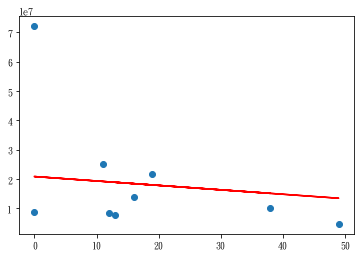

In [173]:
plt.scatter(x_test.ravel(),y_test)
plt.plot(x_test.ravel(),y_predict,'r')

### 結論：由結果可知屋齡對房屋價格沒有太大的影響